# a. Plotte grunnvannsnivå over tid:

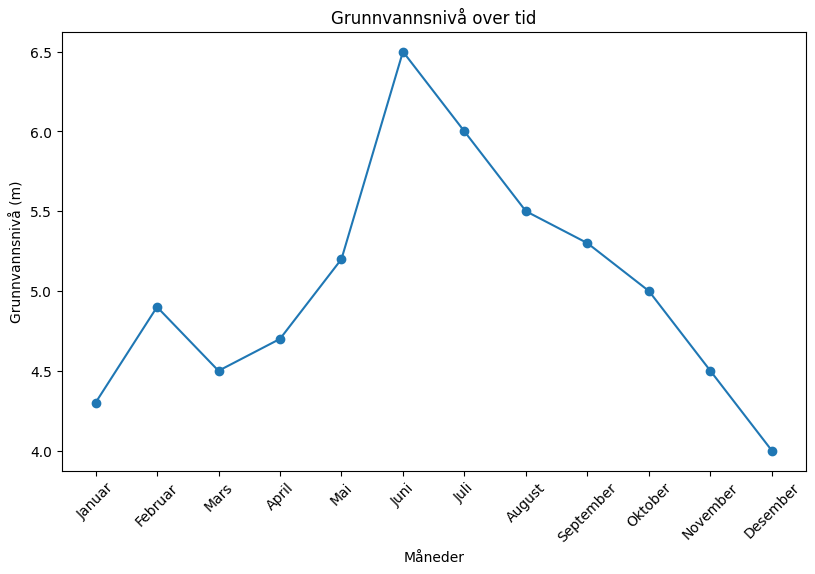

In [2]:
import matplotlib.pyplot as plt
tid = ["Januar", "Februar", "Mars", 'April', 'Mai', 'Juni', 'Juli', 'August', 'September', 'Oktober', 'November', 'Desember']
grunnvannsnivå = [4.3, 4.9, 4.5, 4.7, 5.2, 6.5, 6.0, 5.5, 5.3, 5.0, 4.5, 4.0]
cm = 1 / 2.54
plt.figure(figsize=(21*cm, 29.7*0.5*cm))  # A4 bred, høy (med mål i tommer, derfor multipliseres med cm)
plt.plot(tid, grunnvannsnivå, marker='o')
plt.xlabel('Måneder')
plt.xticks(rotation=45)  # Roterer etikettene for å forhindre overlapping
plt.ylabel('Grunnvannsnivå (m)')
plt.title('Grunnvannsnivå over tid')
# funksjon som automatisk justerer subplot-parametere for å gi angitt padding rundt plotene inne i en figur.
plt.tight_layout()
plt.show()

# b. Histogram av bergartsklassifikasjoner:

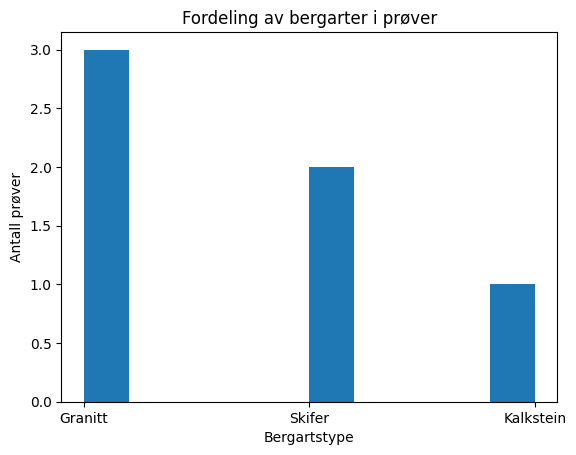

In [3]:
bergarter = ['Granitt', 'Skifer', 'Kalkstein', 'Skifer', 'Granitt', 'Granitt']
plt.hist(bergarter)
plt.title('Fordeling av bergarter i prøver')
plt.xlabel('Bergartstype')
plt.ylabel('Antall prøver')
plt.show()

# c. Grunnleggende plotting med strøk/fall-målinger:

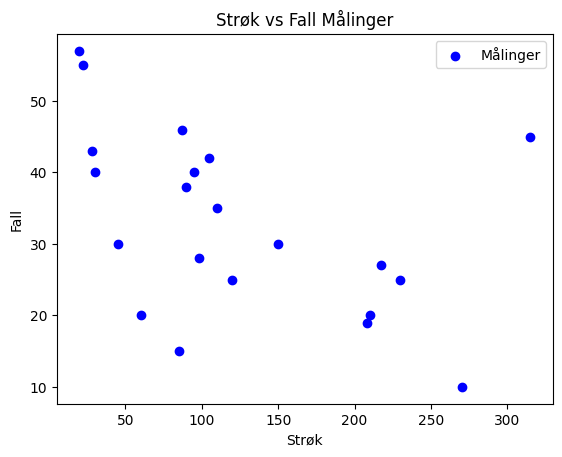

In [13]:
import pandas as pd
from pathlib import Path
fil_bane = Path('../data/05_bergarter.csv')
#lese excel dok med pandas, avhengig av biblioteket openpyxl (pip install openpyxl)
data = pd.read_csv(fil_bane)

# Anta at vi har en DataFrame df med strøk, fall og bergartstype
plt.scatter(data['Strøk'], data['Fall'], c='blue', label='Målinger')
plt.xlabel('Strøk')
plt.ylabel('Fall')
plt.title('Strøk vs Fall Målinger')
plt.legend()
plt.show()

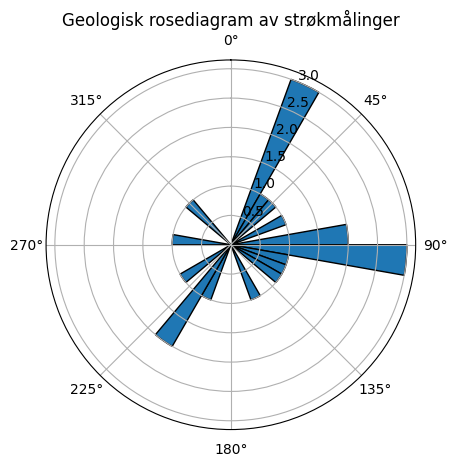

In [15]:
import numpy as np

# Angi størrelsen på hver bin i grader
bin_størrelse = 10  # For eksempel, hver bin dekker 10 grader. Du kan justere dette for forskjellig oppløsning
antal_bins = int(360 / bin_størrelse)
# Sette opp bins for histogrammet
bins = np.linspace(0, 2 * np.pi, antal_bins + 1)

# Konvertere grader til radianer for plotting
data['radianer'] = np.deg2rad(data['Strøk'])

# Plotte rosediagrammet
ax = plt.subplot(111, polar=True)  # tallet 111 i subplot-funksjonen er en tre-sifret heltall hvor den første sifferen representerer antall rader, den andre sifferen representerer antall kolonner, og den tredje sifferen representerer indeksen til det nåværende subplotet.
ax.set_theta_direction(-1)  # Roter med klokken
ax.set_theta_zero_location('N')  # 0 grader på toppen (Nord)

# Telle og plotte data
telling, _ = np.histogram(data['radianer'], bins=bins)
ax.bar(bins[:antal_bins], telling, width=bins[1]-bins[0], align='edge', edgecolor='black')

# Tilpasse plot
ax.set_title("Geologisk rosediagram av strøkmålinger")
plt.show()

# d. Visualisere data basert på bergartstypen:

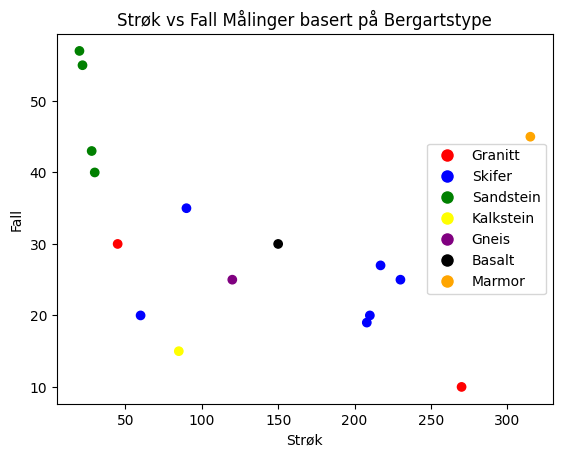

In [43]:
farger = {
    'Granitt': 'red',
    'Skifer': 'blue',
    'Sandstein': 'green',
    'Kalkstein': 'yellow',
    'Gneis': 'purple',
    'Basalt': 'black',
    'Marmor': 'orange'
}

plt.scatter(data['Strøk'], data['Fall'], c=data['Bergartstype'].map(farger), label='Målinger')
plt.xlabel('Strøk')
plt.ylabel('Fall')
plt.title('Strøk vs Fall Målinger basert på Bergartstype')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=farger[key], markersize=10) for key in farger], labels=farger.keys())
plt.show()

# e. Tilpasse plottet:

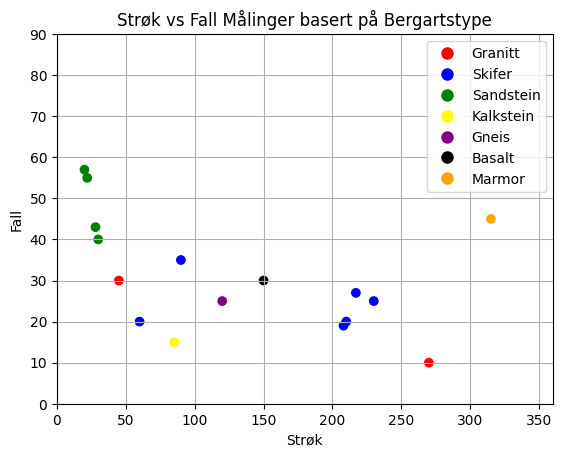

In [44]:
plt.scatter(data['Strøk'], data['Fall'], c=data['Bergartstype'].map(farger), label='Målinger')
plt.xlabel('Strøk')
plt.ylabel('Fall')
plt.title('Strøk vs Fall Målinger basert på Bergartstype')
plt.grid(True)
plt.xlim([0, 360])
plt.ylim([0, 90])
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=farger[key], markersize=10) for key in farger], labels=farger.keys())
plt.show()